## Name : Sangamesh
## Mail id : sangupatil648@gmail.com

# Assignment - 4

## simple linear reggression - delivery_time
## 1) Delivery_time -> Predict delivery time using sorting time
## 2) Salary_hike -> Build a prediction model for ## Salary_hike
## ------------------------------------------------------------
## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [4]:
data = pd.read_csv("delivery_time.csv")

In [28]:
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [30]:
data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [31]:
data.isnull().any()

delivery_time    False
sorting_time     False
dtype: bool

In [32]:
data[data.duplicated()].shape

(0, 2)

In [33]:
data_cleaned1 = data.drop_duplicates()
data_cleaned1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

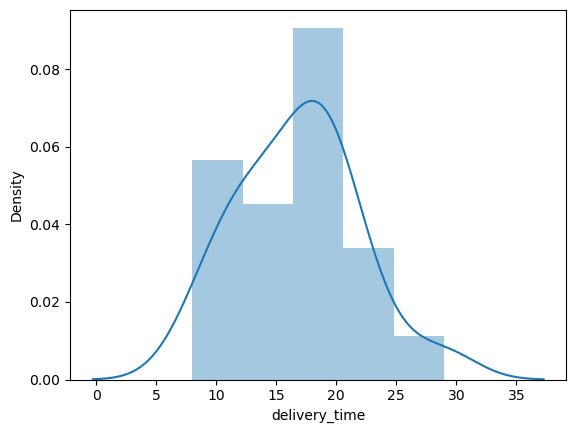

In [34]:
# visualisation
sns.distplot(data['delivery_time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

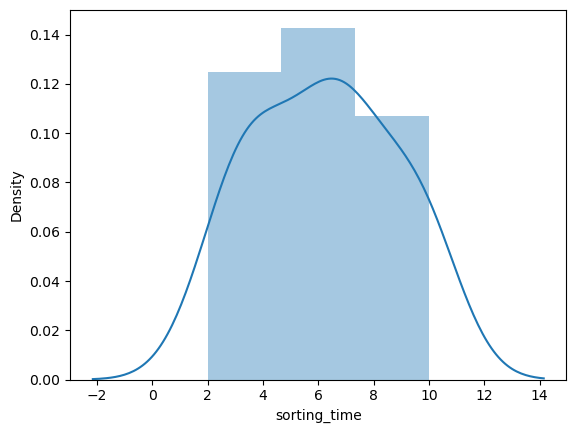

In [35]:
sns.distplot(data['sorting_time'])

<AxesSubplot:>

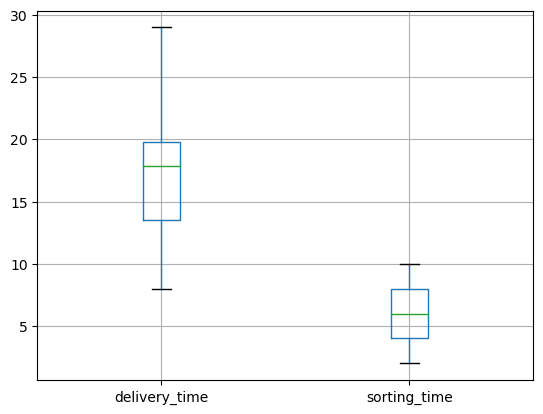

In [54]:
data.boxplot()

In [36]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [37]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

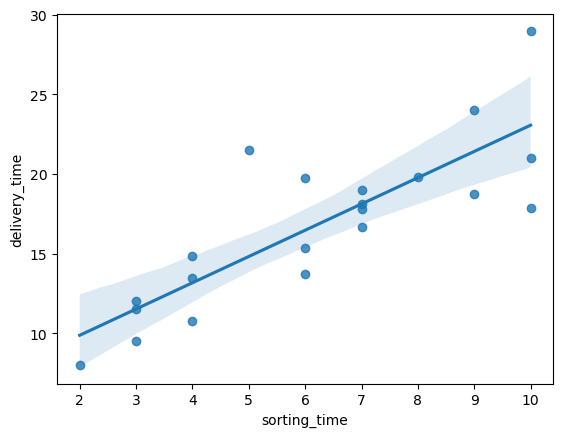

In [38]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [55]:
model1 = smf.ols("delivery_time~sorting_time", data = data).fit()
model1

In [56]:
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [59]:
model1.tvalues , model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [60]:
model1.rsquared , model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [61]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        14:54:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model2=smf.ols("np.log(delivery_time) ~ (sorting_time)",data=data).fit() 

In [67]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 16 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                           14:57:36   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model2.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [69]:
model2.tvalues,model2.pvalues

(Intercept       20.601357
 sorting_time     6.836088
 dtype: float64,
 Intercept       1.857343e-14
 sorting_time    1.592708e-06
 dtype: float64)

In [70]:
model2.rsquared,model2.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [72]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 16 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                           14:58:37   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
model3=smf.ols("np.log(delivery_time) ~ np.log(sorting_time)",data=data).fit() 

In [74]:
model3.params

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64

In [75]:
model3.tvalues,model3.pvalues

(Intercept               13.085552
 np.log(sorting_time)     8.024484
 dtype: float64,
 Intercept               5.921137e-11
 np.log(sorting_time)    1.601539e-07
 dtype: float64)

In [76]:
model3.rsquared,model3.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [77]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 16 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           15:00:39   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
data["sorting_time_sq"]=data.sorting_time**2

In [79]:
model4=smf.ols("np.log(delivery_time) ~ np.log(sorting_time_sq+sorting_time)",data=data).fit() 

In [80]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.769
Model:                               OLS   Adj. R-squared:                  0.757
Method:                    Least Squares   F-statistic:                     63.34
Date:                   Thu, 16 Feb 2023   Prob (F-statistic):           1.81e-07
Time:                           15:03:21   Log-Likelihood:                 10.157
No. Observations:                     21   AIC:                            -16.31
Df Residuals:                         19   BIC:                            -14.23
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.5875      0.153     10.372      0.000       1.267       1.908
np.log(sorting_time_sq + sorting_time)     0.3267      0.041      7.959      0.000       0.241       0.413
==============================================================================
Omnibus:                        1.923   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.194
Skew:                           0.583   Prob(JB):                        0.551
Kurtosis:                       2.930   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model4.params

Intercept                                 1.587528
np.log(sorting_time_sq + sorting_time)    0.326653
dtype: float64

In [82]:
a=int(input('Enter the sorting time:'))
newtime=pd.Series([a])
dt_pred=pd.DataFrame(newtime,columns=["sorting_time"])
b=model3.predict(dt_pred)
print("the delivery time :",b)

Enter the sorting time:5
the delivery time : 0    2.703662
dtype: float64


In [85]:
a=int(input('Enter the sorting time:'))
newtime=pd.Series([a])
dt_pred=pd.DataFrame(newtime,columns=["sorting_time"])
b=model3.predict(dt_pred)
print("the delivery time :",b)

Enter the sorting time:8
the delivery time : 0    2.9845
dtype: float64


In [86]:
a=int(input('Enter the sorting time:'))
newtime=pd.Series([a])
dt_pred=pd.DataFrame(newtime,columns=["sorting_time"])
b=model3.predict(dt_pred)
print("the delivery time :",b)

Enter the sorting time:10
the delivery time : 0    3.117833
dtype: float64
